In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df=pd.read_csv("Iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:

X = df["petal_length"].values.reshape(-1, 1)
y = df["petal_width"].values


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
import matplotlib.pyplot as plt

def locally_weighted_regression(X, y, query_point, tau):
    m, n = X.shape
    weights = np.exp(-np.sum((X - query_point)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)

    # Compute theta using the normal equation for weighted linear regression
    X_transpose_W = X.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X) @ (X_transpose_W @ y)

    # Predict the value at the query point
    prediction = query_point @ theta
    return prediction


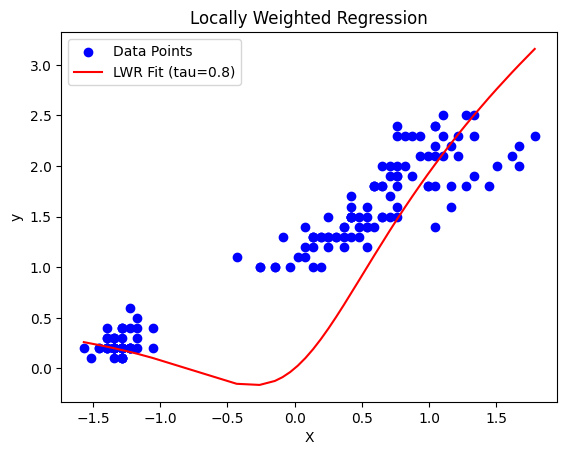

In [6]:

def plot_lwr(X, y, tau):

    # Sort the data points for smoother plotting
    sort_idx = np.argsort(X[:, 0])
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Generate predictions for each data point
    y_pred = np.array([locally_weighted_regression(X, y, x_i, tau) for x_i in X_sorted])

    # Plot the original data and the LWR fit
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X_sorted, y_pred, color='red', label=f'LWR Fit (tau={tau})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Locally Weighted Regression')
    plt.show()

# Set bandwidth parameter
tau = 0.8

# Plot the LWR fit
plot_lwr(X, y, tau)
